In [35]:
import pandas as pd

In [36]:
projects=pd.read_csv("projects.csv/projects.csv")

In [37]:
projects_CA = projects[projects['school_state']=='CA']
projects_CA.shape

(126242, 35)

In [38]:
projects_CA.columns

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted'],
      dtype='object')

In [39]:
CA_region = pd.read_csv("us-cities-table.csv")
CA_region.head()

,population,pop2024,pop2023,pop2022,pop2020,pop2010,growth,region,city,usps,state,countyFips,county,densityMi,slug,areaMi,lng,lat,type,rank
0,3795936,3795936,3820914,3822782,3895848,3795206,-0.00654,Southeast,Los Angeles,CA,California,6037.0,Los Angeles County,8068,california/los-angeles,470.517,-118.411,34.0194,City,1
1,1388996,1388996,1388320,1387378,1386292,1305632,0.00049,Southeast,San Diego,CA,California,6073.0,San Diego County,4260,california/san-diego,326.087,-117.136,32.8150,City,2
2,956433,956433,969655,972082,1009319,954552,-0.01364,West,San Jose,CA,California,6085.0,Santa Clara County,5375,california/san-jose,177.939,-121.815,37.2960,City,3
3,788478,788478,808988,807774,870518,805519,-0.02535,Northwest,San Francisco,CA,California,6075.0,San Francisco County,16884,california/san-francisco,46.700,-123.032,37.7272,City,4
4,546718,546718,545716,545253,542710,497763,0.00184,Central,Fresno,CA,California,6019.0,Fresno County,4720,california/fresno,115.818,-119.793,36.7827,City,5


In [40]:
CA_region = CA_region[['city','region']]
CA_region.head()

,city,region
0,Los Angeles,Southeast
1,San Diego,Southeast
2,San Jose,West
3,San Francisco,Northwest
4,Fresno,Central


In [41]:
CA_region.isnull().sum()

city      0
region    0
dtype: int64

In [42]:
projects_CA.isnull().sum()

projectid                                     0
teacher_acctid                                0
schoolid                                      0
school_ncesid                              6167
school_latitude                               0
school_longitude                              0
school_city                                   0
school_state                                  0
school_zip                                    1
school_metro                               8227
school_district                             109
school_county                                 0
school_charter                                0
school_magnet                                 0
school_year_round                             0
school_nlns                                   0
school_kipp                                   0
school_charter_ready_promise                  0
teacher_prefix                                1
teacher_teach_for_america                     0
teacher_ny_teaching_fellow              

In [43]:
projects_CA = pd.merge(projects_CA, CA_region, left_on='school_city', right_on='city', how='left')

In [44]:
projects_CA.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,city,region
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,Grades 6-8,30.0,555.81,653.89,32.0,f,f,2014-05-12,Selma,South
1,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,Grades PreK-2,30.0,408.40,480.47,24.0,f,f,2014-05-11,Los Angeles,Southeast
2,ed758904cb855e09afc2ffa512fcc393,dd468ba7670637c06afb1a9af8aa7d17,25baeaff8836051c274fa1cd2a260e48,6.227101e+10,34.076739,-118.304313,Los Angeles,CA,90004.0,urban,...,Grades 3-5,30.0,203.86,239.84,30.0,f,f,2014-05-11,Los Angeles,Southeast
3,137cc8578133ac213d87e7408dc8b6a5,4cda287dd1e78c9e71c42a69f4d81592,91e21558106c5bf6f26bbd047dc1340b,6.155100e+10,34.432667,-119.794609,Santa Barbara,CA,93111.0,suburban,...,Grades 3-5,30.0,223.91,263.42,30.0,f,f,2014-05-11,Santa Barbara,South
4,dbb0371432d07b7e7a67b2e3578967a7,71ff6cddcf7bd7d58760470f52792485,253549b5752d520d3acc3b6d96df1f2b,6.344101e+10,37.753613,-122.419875,San Francisco,CA,94110.0,urban,...,Grades 3-5,30.0,459.27,540.32,600.0,f,f,2014-05-11,San Francisco,Northwest


In [45]:
# see nulls
projects_CA[projects_CA['region'].isnull()].head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,city,region
6,5b643940ca27c0a74d27104bac37a722,6a4475c4afbc68de41c181e2f0b175f9,11c6845393ab327399af1ebbe517f753,6.337501e+10,33.981813,-117.885156,Rowland Hghts,CA,91748.0,suburban,...,Grades 9-12,30.0,2016.92,2372.85,20.0,f,f,2014-05-11,NaN,NaN
10,244b1547779f97645b29f8de86078200,144ac2cad0b8cab1ec8a700552305438,35e16fbb1f209e42bdf31735fabd9562,NaN,34.221744,-118.461295,North Hills,CA,91343.0,urban,...,Grades PreK-2,30.0,557.37,655.73,32.0,f,f,2014-05-11,NaN,NaN
11,82a16ad196443cf99043bd9d5aa21ea5,340ad500e98a618018d7481200dd51aa,074ff53e9ffbda2d46134687fe749325,NaN,34.095066,-118.313934,Hollywood,CA,90028.0,urban,...,Grades 9-12,30.0,1643.09,1933.05,90.0,f,f,2014-05-11,NaN,NaN
25,e503b2bd58bcdbd3258fb4ba58824f67,8637782db3d43f2727ab1394e4d8bb0b,0036a188f045950c57c6b829a4ac5d7c,6.314700e+10,37.380550,-122.218140,Portola Vally,CA,94028.0,rural,...,Grades PreK-2,30.0,299.42,352.26,21.0,f,f,2014-05-11,NaN,NaN
26,51f2faf2b017cc2f04ed612c00727b66,74fd7b5fbcac6bf2673bafdcd2728e72,eee7677842ad876a418a7251be7dfc27,6.148800e+10,33.722771,-117.927361,Fountain Vly,CA,92708.0,urban,...,Grades 9-12,30.0,722.19,849.64,160.0,f,f,2014-05-11,NaN,NaN


In [46]:
projects_CA.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,city,region
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,Grades 6-8,30.0,555.81,653.89,32.0,f,f,2014-05-12,Selma,South
1,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,Grades PreK-2,30.0,408.40,480.47,24.0,f,f,2014-05-11,Los Angeles,Southeast
2,ed758904cb855e09afc2ffa512fcc393,dd468ba7670637c06afb1a9af8aa7d17,25baeaff8836051c274fa1cd2a260e48,6.227101e+10,34.076739,-118.304313,Los Angeles,CA,90004.0,urban,...,Grades 3-5,30.0,203.86,239.84,30.0,f,f,2014-05-11,Los Angeles,Southeast
3,137cc8578133ac213d87e7408dc8b6a5,4cda287dd1e78c9e71c42a69f4d81592,91e21558106c5bf6f26bbd047dc1340b,6.155100e+10,34.432667,-119.794609,Santa Barbara,CA,93111.0,suburban,...,Grades 3-5,30.0,223.91,263.42,30.0,f,f,2014-05-11,Santa Barbara,South
4,dbb0371432d07b7e7a67b2e3578967a7,71ff6cddcf7bd7d58760470f52792485,253549b5752d520d3acc3b6d96df1f2b,6.344101e+10,37.753613,-122.419875,San Francisco,CA,94110.0,urban,...,Grades 3-5,30.0,459.27,540.32,600.0,f,f,2014-05-11,San Francisco,Northwest


In [47]:
projects_CA.shape

(126974, 37)

In [48]:
projects_CA.isnull().sum()

projectid                                     0
teacher_acctid                                0
schoolid                                      0
school_ncesid                              6169
school_latitude                               0
school_longitude                              0
school_city                                   0
school_state                                  0
school_zip                                    1
school_metro                               8274
school_district                             109
school_county                                 0
school_charter                                0
school_magnet                                 0
school_year_round                             0
school_nlns                                   0
school_kipp                                   0
school_charter_ready_promise                  0
teacher_prefix                                1
teacher_teach_for_america                     0
teacher_ny_teaching_fellow              

In [49]:
# Dropping columns with too many nulls
projects_CA_sub = projects_CA.drop([
    'school_ncesid', 'school_metro', 'school_district', 
    'secondary_focus_subject', 'secondary_focus_area', 
    'resource_type', 'fulfillment_labor_materials',
    'total_price_excluding_optional_support', 
    'total_price_including_optional_support'], axis=1)

print(projects_CA_sub.isnull().sum())
projects_CA_sub.shape


projectid                                0
teacher_acctid                           0
schoolid                                 0
school_latitude                          0
school_longitude                         0
school_city                              0
school_state                             0
school_zip                               1
school_county                            0
school_charter                           0
school_magnet                            0
school_year_round                        0
school_nlns                              0
school_kipp                              0
school_charter_ready_promise             0
teacher_prefix                           1
teacher_teach_for_america                0
teacher_ny_teaching_fellow               0
primary_focus_subject                   13
primary_focus_area                      13
poverty_level                            0
grade_level                              3
students_reached                        23
eligible_do

(126974, 28)

In [50]:
projects_CA_sub.dropna(inplace=True)
projects_CA_sub.shape

(108538, 28)

In [51]:
# Clustering projects based on region, primary_focus_subject and poverty_level
projects_CA_sub['cluster_id'] = projects_CA_sub.groupby(['region', 'primary_focus_subject', 'poverty_level']).ngroup()
print(projects_CA_sub[['projectid', 'school_city','region', 'primary_focus_subject', 'poverty_level', 'cluster_id']])

                               projectid    school_city     region  \
0       316ed8fb3b81402ff6ac8f721bb31192          Selma      South   
1       24761b686e18e5eace634607acbcc19f    Los Angeles  Southeast   
2       ed758904cb855e09afc2ffa512fcc393    Los Angeles  Southeast   
3       137cc8578133ac213d87e7408dc8b6a5  Santa Barbara      South   
4       dbb0371432d07b7e7a67b2e3578967a7  San Francisco  Northwest   
...                                  ...            ...        ...   
126969  f259203cc36d35da04279114819d0692       San Jose       West   
126970  23c72c86f7f550f310e1e4f0bcedeffc   Redwood City       West   
126971  3c805c83059e1634939c82a1c958a1f3       Richmond  Northwest   
126972  85556214e9871b43bb84202e89eeb8d6       San Jose       West   
126973  5a1d1e515fd17d89d74ee2c9dcaa70f4       San Jose       West   

        primary_focus_subject    poverty_level  cluster_id  
0        Literature & Writing  highest poverty         222  
1                 Mathematics  highes

In [52]:
projects_CA_sub.isnull().sum()

projectid                            0
teacher_acctid                       0
schoolid                             0
school_latitude                      0
school_longitude                     0
school_city                          0
school_state                         0
school_zip                           0
school_county                        0
school_charter                       0
school_magnet                        0
school_year_round                    0
school_nlns                          0
school_kipp                          0
school_charter_ready_promise         0
teacher_prefix                       0
teacher_teach_for_america            0
teacher_ny_teaching_fellow           0
primary_focus_subject                0
primary_focus_area                   0
poverty_level                        0
grade_level                          0
students_reached                     0
eligible_double_your_impact_match    0
eligible_almost_home_match           0
date_posted              

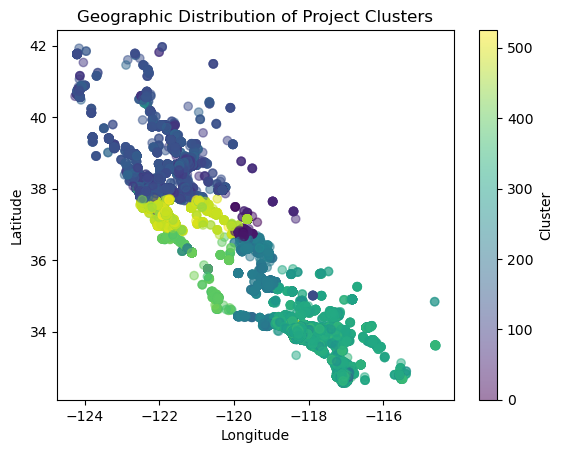

In [53]:
import matplotlib.pyplot as plt

plt.scatter(projects_CA_sub['school_longitude'], projects_CA_sub['school_latitude'], c=projects_CA_sub['cluster_id'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Project Clusters')
plt.show()

In [54]:
donors = pd.read_csv("donations.csv/donations.csv")
donors = donors[['projectid', 'donor_acctid']]
donors.head()

,projectid,donor_acctid
0,ffffac55ee02a49d1abc87ba6fc61135,22cbc920c9b5fa08dfb331422f5926b5
1,ffffac55ee02a49d1abc87ba6fc61135,521f1830a77c9dbbf8119d99c6206a16
2,ffffac55ee02a49d1abc87ba6fc61135,1e0a63fc8141c7ba26b8b44ca0871b90
3,ffffac55ee02a49d1abc87ba6fc61135,1d4acb508df29d5f1cc6d382969576cb
4,ffffac55ee02a49d1abc87ba6fc61135,59c3c3cfcccc53ae855f7eee911c478b


In [55]:
projects_clusters = projects_CA_sub[['projectid', 'cluster_id']]
projects_clusters.isnull().sum()

projectid     0
cluster_id    0
dtype: int64

In [56]:
# number of clusters
projects_clusters['cluster_id'].nunique()

526

In [57]:
clustering_metric = pd.merge(projects_clusters, donors, on='projectid', how='left')
clustering_metric.isnull().sum()

projectid           0
cluster_id          0
donor_acctid    19741
dtype: int64

In [58]:
# rename columns
clustering_metric.rename(columns={'donor_acctid':'donor_id'}, inplace=True)

In [59]:
import pandas as pd
import numpy as np


def calculate_weighted_entropy(df: pd.DataFrame) -> pd.DataFrame:
    # Step 1: Calculate the count of donations per donor
    donor_total_counts = df.groupby('donor_id').size().reset_index(name='total_count')

    # Step 2: Filter out donors who donated fewer than 2 times
    valid_donors = donor_total_counts[donor_total_counts['total_count'] >= 2]['donor_id']
    filtered_df = df[df['donor_id'].isin(valid_donors)]

    # Step 3: Calculate the count of donations per donor per cluster
    donor_cluster_counts = filtered_df.groupby(['donor_id', 'cluster_id']).size().reset_index(name='count')

    # Step 4: Calculate the total count of donations per donor
    donor_total_counts = donor_cluster_counts.groupby('donor_id')['count'].sum().reset_index(name='total_count')

    # Step 5: Merge to get the total count per donor
    donor_cluster_counts = donor_cluster_counts.merge(donor_total_counts, on='donor_id')

    # Step 6: Calculate the probability of donating to each cluster for each donor
    donor_cluster_counts['probability'] = donor_cluster_counts['count'] / donor_cluster_counts['total_count']

    # Step 7: Calculate the entropy for each donor
    donor_cluster_counts['entropy_component'] = -donor_cluster_counts['probability'] * np.log2(donor_cluster_counts['probability'])
    entropy_df = donor_cluster_counts.groupby('donor_id')['entropy_component'].sum().reset_index()
    entropy_df.rename(columns={'entropy_component': 'entropy'}, inplace=True)

    # Step 8: Calculate the weight adjustment for each donor
    entropy_df = entropy_df.merge(donor_total_counts, on='donor_id')
    entropy_df['weight_adjustment'] = 1 / (np.log(entropy_df['total_count'] + 1) + 1)

    # Step 9: Calculate the weighted entropy
    entropy_df['weighted_entropy'] = entropy_df['entropy'] * entropy_df['weight_adjustment']

    # Return the final DataFrame with donor_id, entropy, and weighted_entropy
    return entropy_df[['donor_id', 'entropy', 'weighted_entropy']]




In [60]:
entropy_df = calculate_weighted_entropy(clustering_metric)
print(entropy_df)

                               donor_id   entropy  weighted_entropy
0      0000482911ae76b75d260d9f1fe60bca  1.918296          0.651173
1      000131ab172291002281c7bcbc23a0b6  1.000000          0.476505
2      0006f3a33e15d561eaa187402ab6a564  0.000000          0.000000
3      00080c99912eae7f223122fe6f04d1f9  1.000000          0.476505
4      000d9bec61ae539f9323dabd7ba7dc8a  1.000000          0.476505
...                                 ...       ...               ...
59668  fffa28a29c9ab8ac16494bb026a6545c  0.000000          0.000000
59669  fffb15d0f430ce9eb9ac9a1ee8ac3187  2.000000          0.766449
59670  fffbd6241b2096a550503e49570d5538  1.000000          0.476505
59671  fffbf616e35301c5265010f943aec727  0.000000          0.000000
59672  fffce3f0a6d8e368b0022b94cc686f69  1.000000          0.476505

[59673 rows x 3 columns]


In [61]:
avg_weighted_entropy = entropy_df['weighted_entropy'].mean()
print(avg_weighted_entropy)

0.41180394195863107


In [70]:
x = pd.read_csv("clustering_data_cleaned.csv")

In [71]:
y = pd.merge(x, projects_clusters, on='projectid', how='right')
y.isnull().sum()

projectid                                 0
school_charter                            0
school_magnet                             0
school_year_round                         0
school_nlns                               0
                                         ..
primary_focus_area_Literacy & Language    0
primary_focus_area_Math & Science         0
primary_focus_area_Music & The Arts       0
primary_focus_area_Special Needs          0
cluster_id                                0
Length: 63, dtype: int64

In [72]:
y.drop('projectid', axis=1, inplace=True)

In [73]:
x.isnull().sum()

projectid                                 0
school_charter                            0
school_magnet                             0
school_year_round                         0
school_nlns                               0
                                         ..
primary_focus_area_History & Civics       0
primary_focus_area_Literacy & Language    0
primary_focus_area_Math & Science         0
primary_focus_area_Music & The Arts       0
primary_focus_area_Special Needs          0
Length: 62, dtype: int64

In [74]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

score = calinski_harabasz_score(y, y['cluster_id'])
print("Calinski-Harabasz Index:", score)

dbi = davies_bouldin_score(y, y['cluster_id'])
print(f"Davies-Bouldin Index: {dbi}")

Calinski-Harabasz Index: 3019855.604921115
Davies-Bouldin Index: 1.3164689113902628
